 <h1> Machine Learning with Linear Regression </h1>

This is Vehicle dataset from cardekho Dataset . This dataset contains information about used cars listed on website cardekho.com. We are going to use for finding predictions of price with the use of regression models.


### Importing the Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


The datasets consist of several independent variables include:

Car_Name : This column should be filled with the name of the car.

Year : This column should be filled with the year in which the car was bought.

Selling_Price : This column should be filled with the price the owner wants to sell the car at.

Present_Price : This is the current ex-showroom price of the car.

Kms_Driven : This is the distance completed by the car in km.

Fuel_Type : Fuel type of the car i.e Diesel,Petrol,CNG

Seller_Type : Defines whether the seller is a dealer or an individual.

Transmission : Defines whether the car is manual or automatic.

Owner : Defines the number of owners the car has previously had.

### Data Collection

In [2]:
# loading the data from csv file to pandas Datafram
data = pd.read_csv ("car data.csv")

In [3]:
#inspacting the first five rows from datafram
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# chacking the number of rows and columns
print("shape of data", data.shape)

shape of data (301, 9)


In [5]:
# getting some information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# chacking the number of missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# chacking the distribution of catagorical data
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


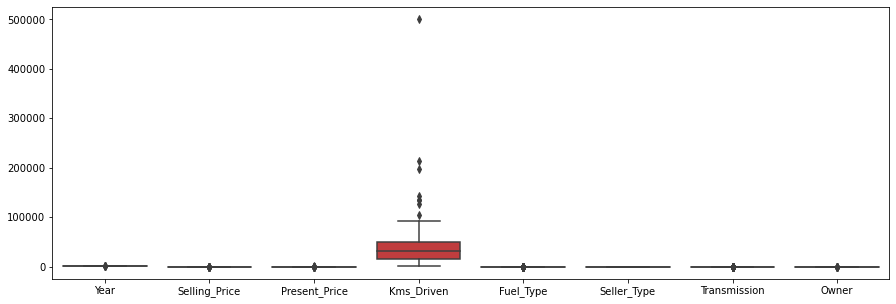

In [106]:
plt.figure(figsize = (15,5))
sns.boxplot(data=data)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

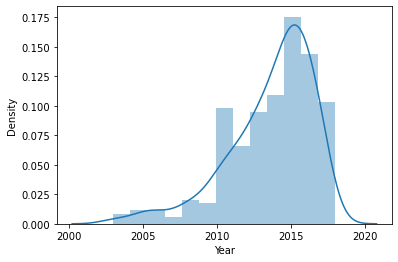

In [108]:
sns.distplot(data['Year'])

In [109]:
# The Years variable is left skewed

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


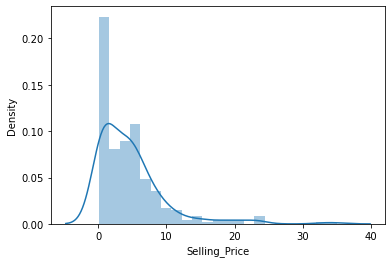

In [111]:
sns.distplot(data['Selling_Price'])
plt.show()

In [112]:
# selling_price variable is right skewed

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


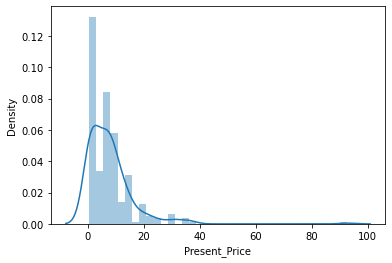

In [113]:
sns.distplot(data['Present_Price'])
plt.show()

In [114]:
# present_price variable is right skewed

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


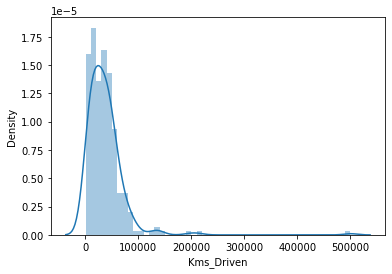

In [116]:
sns.distplot(data['Kms_Driven'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


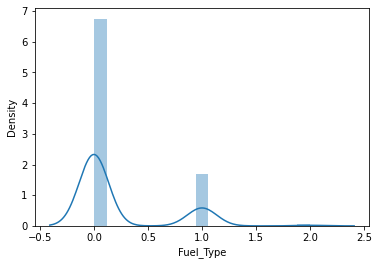

In [117]:
sns.distplot(data['Fuel_Type'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


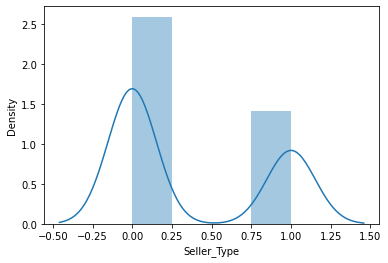

In [115]:
sns.distplot(data['Seller_Type'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


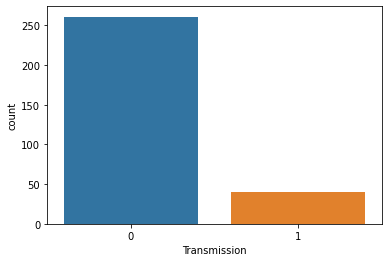

In [118]:
sns.countplot(data['Transmission'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


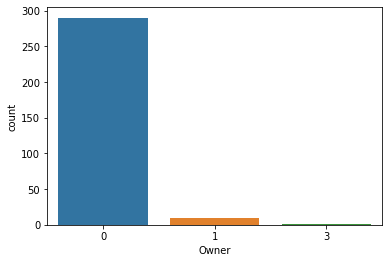

In [119]:
sns.countplot(data['Owner'])
plt.show()

### Encoding the categorical data

In [8]:
# encoding the Fule_Type column
data.replace({'Fuel_Type' : {'Petrol':0 ,'Diesel':1 ,'CNG':2  }}, inplace=True)

# encoding the Seller_Type column
data.replace({'Seller_Type' : {'Dealer':0 ,'Individual':1}}, inplace=True)

# encoding the Transmission column
data.replace({'Transmission' : {'Manual':0 ,'Automatic':1}}, inplace=True)


In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [92]:
# splitting the data into independent data and depandent data
y= data["Selling_Price"]
x= data.drop(["Selling_Price",'Car_Name'] ,axis=1)
print( x)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [90]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [99]:
# splitting the data into train and test data
x_train,x_test, y_train,y_test = train_test_split(x , y, test_size=0.2, random_state=2)

In [100]:
print("x test shape" , x_test.shape)
print("x train shape" , x_train.shape)
print("y test shape" , y_test.shape)
print("y train shape" , y_train.shape)

x test shape (61, 7)
x train shape (240, 7)
y test shape (61,)
y train shape (240,)


### Linear Regression
 1. Model Training

In [101]:
#loding the linear regression model
lin_reg_model=LinearRegression()

In [102]:
lin_reg_model.fit(x_train, y_train )

LinearRegression()

In [103]:
training_data_prediction=lin_reg_model.predict(x_train)

2. Modal evaluation

In [104]:
# R squre#prediction on training data
error_squre=metrics.r2_score(y_train ,training_data_prediction)
print("R squre error :", error_squre)

R squre error : 0.8838169193709792


visulising the actule value and predicted value

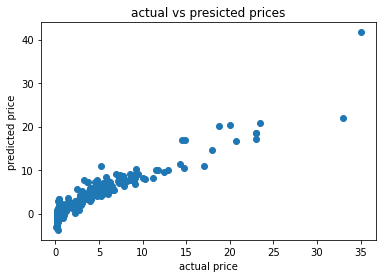

In [45]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs presicted prices")
plt.show()

In [37]:
#prediction on training data
test_data_prediction =lin_reg_model.predict(x_test)

In [38]:
# R squre#prediction on training data
test_data_prediction =lin_reg_model.predict(x_test) 
error_squre=metrics.r2_score(y_test ,test_data_prediction)
print("R squre error :", error_squre)

R squre error : 0.8401532365377686


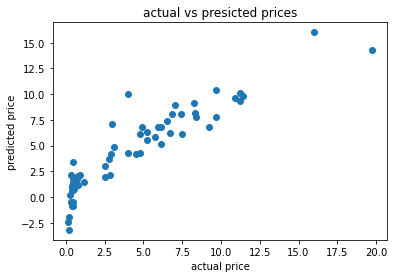

In [39]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs presicted prices")
plt.show()

### Lasso Regression
1.Model training

In [53]:
#loding the linear regression model
lesso_reg_model=Lasso()

In [54]:
lesso_reg_model.fit(x_train, y_train )

Lasso()

In [55]:
training_data_prediction=lesso_reg_model.predict(x_train)

2. Modal evaluation

In [56]:
#prediction on training data
training_data_prediction =lesso_reg_model.predict(x_train)

In [57]:
# R squre#prediction on training data
training_data_prediction =lesso_reg_model.predict(x_train) 
error_squre=metrics.r2_score(y_train ,training_data_prediction)
print("R squre error :", error_squre)

R squre error : 0.8435873952582831


visulising the actule value and predicted value

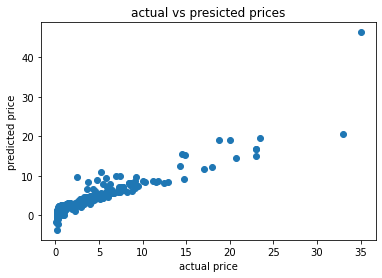

In [58]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs presicted prices")
plt.show()

In [64]:
#prediction on training data
test_data_prediction =lesso_reg_model.predict(x_test)

In [68]:
# R squre#prediction on training data
test_data_prediction =lesso_reg_model.predict(x_test) 
error_squre=metrics.r2_score(y_test ,test_data_prediction)
print("R squre error :", error_squre)

R squre error : 0.8497457570738539


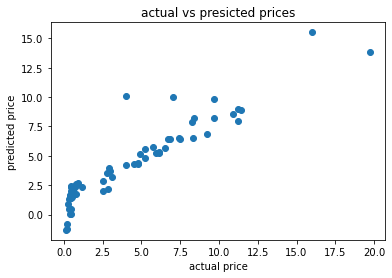

In [69]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs presicted prices")
plt.show()

In [86]:
import numpy as np
prediction = lesso_reg_model.predict((np.array([[2004,6.87,42450,1,0,0,0]])))
print("result" , prediction)

result [0.92644291]


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [87]:
import numpy as np
prediction = lin_reg_model.predict((np.array([[2004,6.87,42450,1,0,0,0]])))
print("result" , prediction)

result [2.05781754]


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
